In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
I = cv2.imread('../data/images/I.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
J = cv2.imread('../data/images/J.jpg')
J = cv2.cvtColor(J, cv2.COLOR_BGR2GRAY)

difference = cv2.absdiff(I, J)

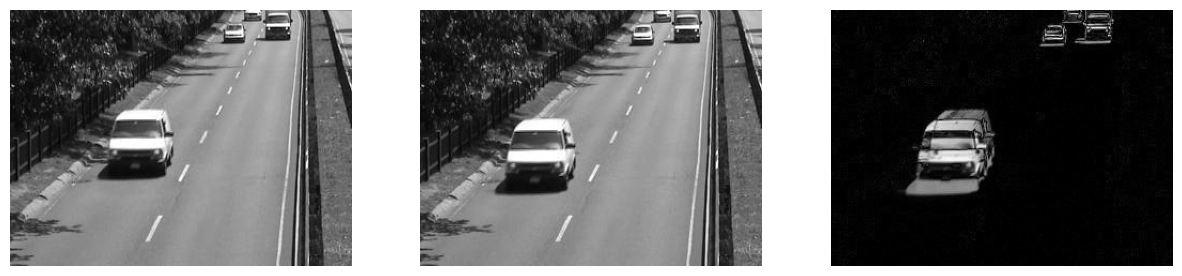

In [3]:
plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(I, 'gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(J, 'gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(difference, 'gray')
plt.axis('off')
plt.show()

In [13]:
W2 = 3
dX = dY = 3
X, Y = I.shape
u = np.zeros(I.shape)
v = np.zeros(I.shape)

In [17]:
X, Y

(240, 320)

In [28]:
for j in range(W2, X - W2):
    for i in range(W2, Y - W2):
        IO = I[j-W2:j+W2+1, i-W2:i+W2+1].astype(float)

        min_distance = np.inf
        for y in range(-dX, dX + 1):
            for x in range(-dY, dY + 1):
                # if 0 <= j+y <= X - W2 and 0 <= i + x <= Y - W2 and 0 <= j-W2+y < X and 0 <= i-W2+x < Y:
                if 0 <= j + y - W2 < X and 0 <= i + x - W2 < Y and 0 <= j + y + W2 < X and 0 <= i + x + W2 < Y:
                    JO = J[j-W2+y:j+W2+y+1, i-W2+x:i-W2+x+1].astype(float)
                    distance = np.sqrt(np.sum(np.square(JO - IO)))
                    if distance < min_distance:
                        min_distance = distance
                        u[j, i] = x
                        v[j, i] = y

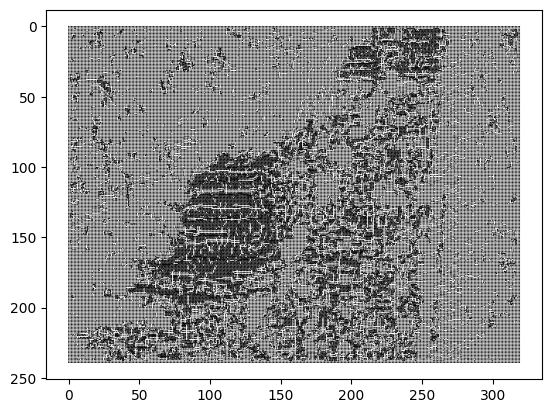

In [40]:
W2 = 1
dX = dY = 1

XX, YY = I.shape

cv2.imshow("roznica", cv2.absdiff(I, J))

u = np.zeros((XX, YY))
v = np.zeros((XX, YY))

for j in range(W2 * 2, XX - (W2 * 2)):
    for i in range(W2 * 2, YY - (W2 * 2)):
        IO = np.float32(I[j - W2:j + W2 + 1, i - W2:i + W2 + 1])
        cnt = 0
        for x in range(j - dX, j + dX + 1):
            for y in range(i - dY, i + dY + 1):
                JO = np.float32(J[x - W2:x + W2 + 1, y - W2:y + W2 + 1])
                if cnt == 0:
                    distance = np.sum(np.sqrt((np.square(JO - IO))))
                    distance_old = distance
                else:
                    distance = np.sum(np.sqrt((np.square(JO - IO))))

                if distance <= distance_old:
                    v[j, i] = x - j
                    u[j, i] = y - i
                    distance_old = distance

                cnt += 1

plt.quiver(u, v)
plt.gca().invert_yaxis()    
plt.show()